# Cryptocurrency Data Visualization and Bitcoin Price Prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

##Task 1 : Importing all the necessary libraries

In [ ]:
import pandas as pd       #Data analysis and Manipulation
from fbprophet import Prophet # Bitcoin Price Prediction


In [ ]:
import plotly.offline as py           # create table
import plotly.graph_objs as go        #create candlestick charts             # Importing Plotly
import plotly.express as px           #create Violin plots, pie charts, box plot, scatter plots,line graph, area graph

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly

##Task 2 : Importing the dataset and analyzing it

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2.1 top_coins.csv to 2.1 top_coins (1).csv


In [ ]:
df = pd.read_csv('2.1 top_coins.csv')

In [ ]:
df

Date     Open     High  ...  Adj Close     Volume  Currency
0      10/1/2015  236.004  238.445  ...    237.549   20488800   Bitcoin
1      10/2/2015  237.264  238.541  ...    237.293   19677900   Bitcoin
2      10/3/2015  237.202  239.315  ...    238.730   16482700   Bitcoin
3      10/4/2015  238.531  238.968  ...    238.259   12999000   Bitcoin
4      10/5/2015  238.147  240.383  ...    240.383   23335900   Bitcoin
...          ...      ...      ...  ...        ...        ...       ...
35733  9/26/2020   68.514   69.631  ...     69.184  298621240      Dash
35734  9/27/2020   69.183   69.885  ...     68.749  284471075      Dash
35735  9/28/2020   68.749   70.044  ...     67.521  296838687      Dash
35736  9/29/2020   67.511   68.794  ...     68.659  286638250      Dash
35737  9/30/2020   68.596   69.109  ...     69.109  266434156      Dash

[35738 rows x 8 columns]

In [ ]:
#groupby
df.groupby(['Currency']).count()

Date  Open  High   Low  Close  Adj Close  Volume
Currency                                                      
Binance Coin  2326  2326  2326  2326   2326       2326    2326
Bitcoin       3652  3652  3652  3652   3652       3652    3652
Bitcoin Cash  2330  2330  2330  2330   2330       2330    2330
Cardano       1080  1080  1080  1080   1080       1080    1080
Chainlink     2212  2212  2212  2212   2212       2212    2212
Dash          3652  3652  3652  3652   3652       3652    3652
Ethereum      3652  3652  3652  3652   3652       3652    3652
Litecoin      3652  3652  3652  3652   3652       3652    3652
Ripple        3652  3652  3652  3652   3652       3652    3652
Stellar       3652  3652  3652  3652   3652       3652    3652
Tether        3652  3652  3652  3652   3652       3652    3652
Tron          2226  2226  2226  2226   2226       2226    2226

In [ ]:
df.info

<bound method DataFrame.info of             Date     Open     High  ...  Adj Close     Volume  Currency
0      10/1/2015  236.004  238.445  ...    237.549   20488800   Bitcoin
1      10/2/2015  237.264  238.541  ...    237.293   19677900   Bitcoin
2      10/3/2015  237.202  239.315  ...    238.730   16482700   Bitcoin
3      10/4/2015  238.531  238.968  ...    238.259   12999000   Bitcoin
4      10/5/2015  238.147  240.383  ...    240.383   23335900   Bitcoin
...          ...      ...      ...  ...        ...        ...       ...
35733  9/26/2020   68.514   69.631  ...     69.184  298621240      Dash
35734  9/27/2020   69.183   69.885  ...     68.749  284471075      Dash
35735  9/28/2020   68.749   70.044  ...     67.521  296838687      Dash
35736  9/29/2020   67.511   68.794  ...     68.659  286638250      Dash
35737  9/30/2020   68.596   69.109  ...     69.109  266434156      Dash

[35738 rows x 8 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35738 entries, 0 to 35737
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35738 non-null  object 
 1   Open       35738 non-null  float64
 2   High       35738 non-null  float64
 3   Low        35738 non-null  float64
 4   Close      35738 non-null  float64
 5   Adj Close  35738 non-null  float64
 6   Volume     35738 non-null  int64  
 7   Currency   35738 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.2+ MB


In [ ]:
df.describe()

Open          High  ...     Adj Close        Volume
count  35738.000000  35738.000000  ...  35738.000000  3.573800e+04
mean     620.119789    637.314368  ...    620.692862  2.862706e+09
std     2052.719483   2108.318553  ...   2054.123362  7.715742e+09
min        0.001000      0.002000  ...      0.001000  1.160000e+02
25%        0.260000      0.275000  ...      0.261000  2.608815e+07
50%        4.019000      4.119000  ...      4.025000  2.482212e+08
75%      162.596000    168.243000  ...    162.891000  1.595345e+09
max    19475.801000  20089.000000  ...  19497.400000  9.931533e+10

[8 rows x 6 columns]

##Task3: Data Visualization- All top Cruptcurrencies

### Table : Visualizing data

In [ ]:
from plotly.figure_factory import create_table
table = create_table(df.head(10), colorscale='plasma')
py.iplot(table)

In [ ]:
from plotly.figure_factory import create_table
table = create_table(df.head(10), colorscale='blues')
py.iplot(table)

###Box plot : Analyzing volume

In [ ]:
px.box(df, x='Currency', y='Volume')

### Pie Chart : Analyzing volume

In [ ]:
px.pie(df, values='Volume', names='Currency')

###Violin Plot: Analyzing Price

In [ ]:
px.violin(df, x='Currency',  y="Close")

In [ ]:
px.box(df, x='Currency',  y="Close", log_y=True)

### Scatter Plots : Comparing between Currencies

In [ ]:
px.scatter(df, x='Close', y='Volume', hover_data=['High','Low','Date'], color='Currency', height=400)

In [ ]:
#with log function
px.scatter(df, x='Close', y='Volume', hover_data=['High','Low','Date'], color='Currency', height=400, log_x=True, log_y=True)

## Task 4 :Crypto Specific Financial Data Visualization- Bitcoin

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1.1 bitcoin_data.csv to 1.1 bitcoin_data (1).csv


In [ ]:
df_bitcoin = pd.read_csv('1.1 bitcoin_data.csv')

In [ ]:
df_bitcoin

Date          Open  ...     Adj Close        Volume
0     2014-09-17    465.864014  ...    457.334015  2.105680e+07
1     2014-09-18    456.859985  ...    424.440002  3.448320e+07
2     2014-09-19    424.102997  ...    394.795990  3.791970e+07
3     2014-09-20    394.673004  ...    408.903992  3.686360e+07
4     2014-09-21    408.084991  ...    398.821014  2.658010e+07
...          ...           ...  ...           ...           ...
2201  2020-09-26  10702.237305  ...  10754.437500  1.810501e+10
2202  2020-09-27  10752.939453  ...  10774.426758  1.801688e+10
2203  2020-09-28  10771.641602  ...  10721.327148  2.272037e+10
2204  2020-09-29  10712.462891  ...  10848.830078  2.045987e+10
2205  2020-09-30  10845.411133  ...  10787.618164  2.075962e+10

[2206 rows x 7 columns]

In [ ]:
# Bitcoin specific Area graph
px.area(df_bitcoin, x="Date", y="Close")

In [ ]:
px.line(df_bitcoin, x="Date", y="Volume")

In [ ]:
# Bitcoin specific Violin plot
px.violin(df_bitcoin,  y="Volume")

In [ ]:
# CandleStick Charts- Financial data visualization
fig = go.Figure(go.Candlestick(
                            x=df_bitcoin["Date"],
                            open=df_bitcoin['Open'],
                            high=df_bitcoin['High'],
                            low=df_bitcoin['Low'],
                            close=df_bitcoin['Close']
                            ))

fig.show()

# Bitcoin Prediction using Facebook Prophet

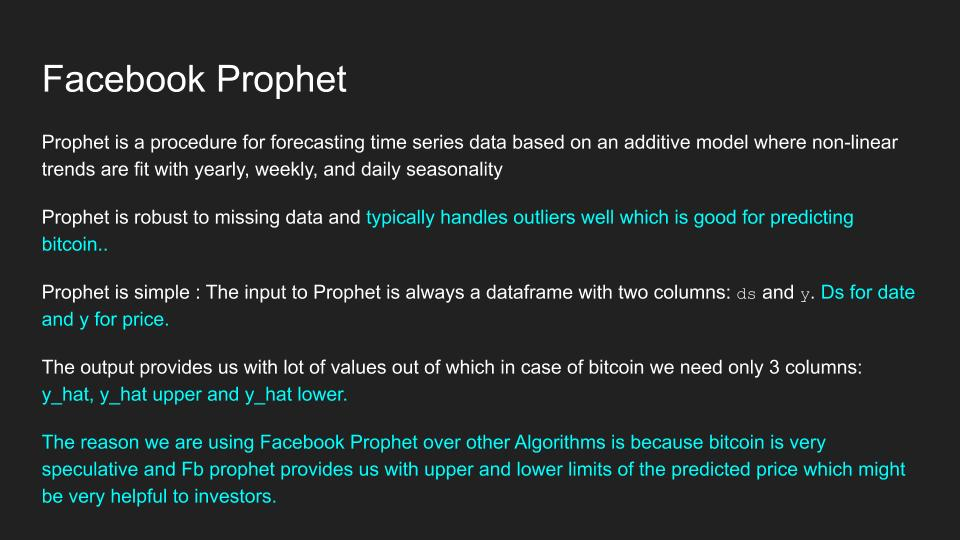

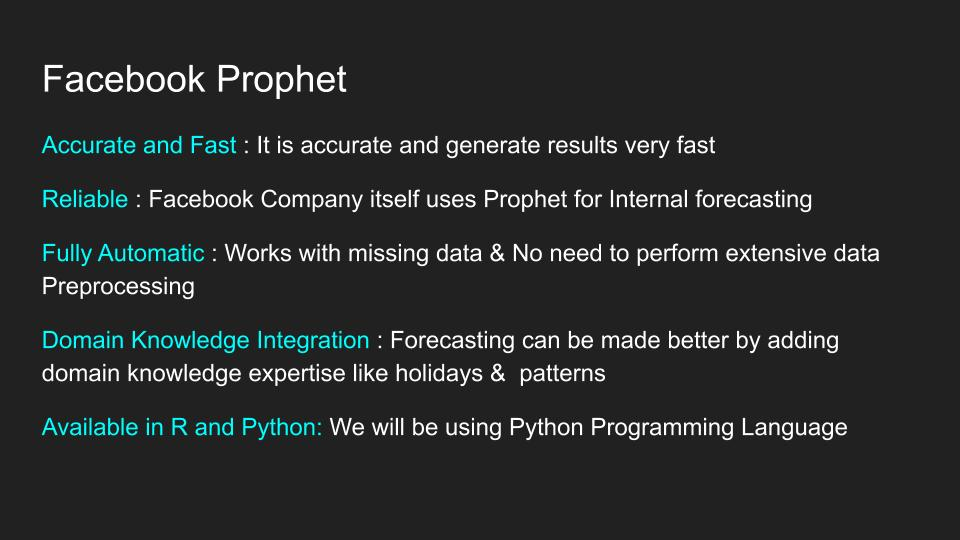

In [ ]:
# We have imported fb Prophet in the first task.

## Task 5:  Data Preperation

In [ ]:
df_bitcoin

Date          Open  ...     Adj Close        Volume
0     2014-09-17    465.864014  ...    457.334015  2.105680e+07
1     2014-09-18    456.859985  ...    424.440002  3.448320e+07
2     2014-09-19    424.102997  ...    394.795990  3.791970e+07
3     2014-09-20    394.673004  ...    408.903992  3.686360e+07
4     2014-09-21    408.084991  ...    398.821014  2.658010e+07
...          ...           ...  ...           ...           ...
2201  2020-09-26  10702.237305  ...  10754.437500  1.810501e+10
2202  2020-09-27  10752.939453  ...  10774.426758  1.801688e+10
2203  2020-09-28  10771.641602  ...  10721.327148  2.272037e+10
2204  2020-09-29  10712.462891  ...  10848.830078  2.045987e+10
2205  2020-09-30  10845.411133  ...  10787.618164  2.075962e+10

[2206 rows x 7 columns]

In [ ]:
columns = ["Date", "Close"]
df1 = pd.DataFrame(df_bitcoin, columns=columns)

In [ ]:
df1

Date         Close
0     2014-09-17    457.334015
1     2014-09-18    424.440002
2     2014-09-19    394.795990
3     2014-09-20    408.903992
4     2014-09-21    398.821014
...          ...           ...
2201  2020-09-26  10754.437500
2202  2020-09-27  10774.426758
2203  2020-09-28  10721.327148
2204  2020-09-29  10848.830078
2205  2020-09-30  10787.618164

[2206 rows x 2 columns]

In [ ]:
prophet_df = df1.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

ds             y
0     2014-09-17    457.334015
1     2014-09-18    424.440002
2     2014-09-19    394.795990
3     2014-09-20    408.903992
4     2014-09-21    398.821014
...          ...           ...
2201  2020-09-26  10754.437500
2202  2020-09-27  10774.426758
2203  2020-09-28  10721.327148
2204  2020-09-29  10848.830078
2205  2020-09-30  10787.618164

[2206 rows x 2 columns]

## Task 6: Modelling

In [ ]:
m = Prophet()

In [ ]:
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Task 7: Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)

In [ ]:
future

ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
2231 2020-10-26
2232 2020-10-27
2233 2020-10-28
2234 2020-10-29
2235 2020-10-30

[2236 rows x 1 columns]

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast

ds        trend  ...  multiplicative_terms_upper         yhat
0    2014-09-17   468.142612  ...                         0.0   778.988116
1    2014-09-18   467.585449  ...                         0.0   738.314406
2    2014-09-19   467.028285  ...                         0.0   726.048367
3    2014-09-20   466.471121  ...                         0.0   712.335851
4    2014-09-21   465.913958  ...                         0.0   668.256152
...         ...          ...  ...                         ...          ...
2231 2020-10-26  9486.747924  ...                         0.0  9531.113769
2232 2020-10-27  9488.381608  ...                         0.0  9541.667235
2233 2020-10-28  9490.015292  ...                         0.0  9564.691154
2234 2020-10-29  9491.648976  ...                         0.0  9562.016865
2235 2020-10-30  9493.282660  ...                         0.0  9583.791150

[2236 rows x 19 columns]

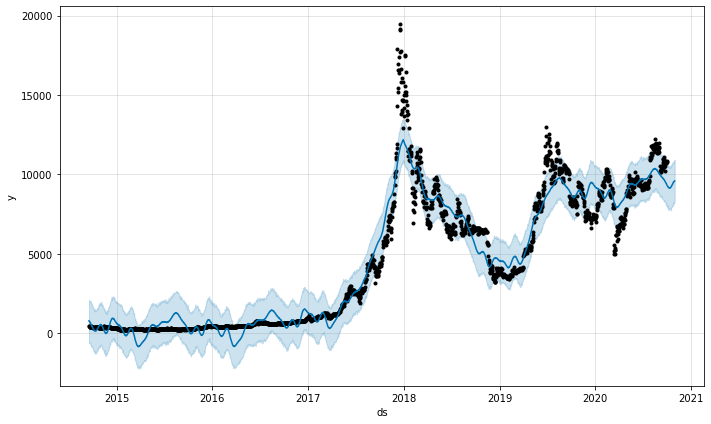

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

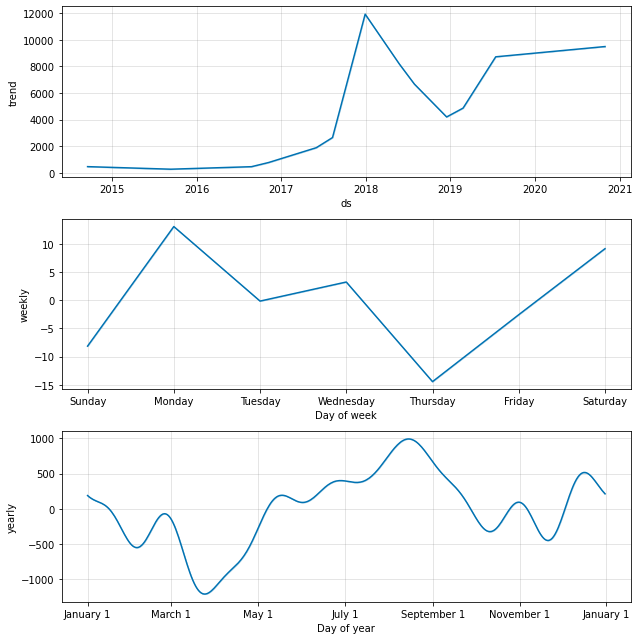

In [ ]:
figure2 = m.plot_components(forecast)

##Task 8: Downloading the Forecast data

In [ ]:
forecast.to_csv('forecast.csv')

In [ ]:
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>